/var/folders/m9/frbq2rzx7gb6k4ntfp_m5bbc0000gn/T/ipykernel_6903/3732892265.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', len(graph.nodes()))


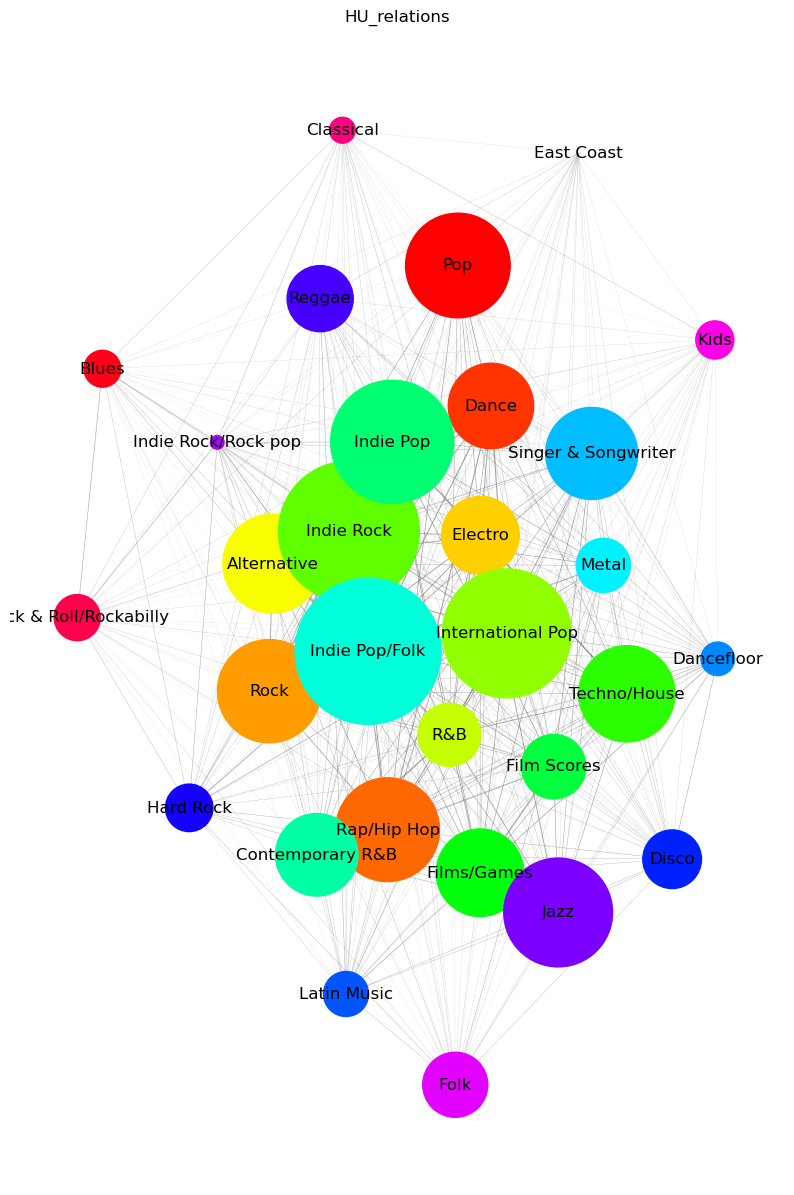

In [17]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


hr_heatmap = pd.read_csv("HU_relations_heatmap.csv").drop('index', axis=1)
genres = hr_heatmap.columns.values
df = hr_heatmap.set_index(pd.Index(genres))

# Получение списка жанров из колонок
genres = df.columns.tolist()

# Создание пустой таблицы
table = pd.DataFrame(columns=['Жанр1', 'Жанр2', 'Слушателей обоих', 'Слушателей жанра 1', 'Вес между связью'])

# Заполнение таблицы значениями
for i in range(len(genres)):
    for j in range(i + 1, len(genres)):
        genre1 = genres[i]
        genre2 = genres[j]
        listeners_both = df.iloc[i, j]  # Кол-во слушателей обоих жанров
        listeners_genre1 = df.iloc[i, i]  # Кол-во слушателей жанра1
        weight = listeners_both / (listeners_genre1/2) # Вес между связью (относительно кол-ва слушателей жанра1)
        row = pd.DataFrame({'Жанр1': genre1, 'Жанр2': genre2, 'Слушателей обоих': listeners_both, 'Слушателей жанра 1': listeners_genre1/2, 'Вес между связью': weight}, index=[0])
        table = pd.concat([table, row], ignore_index=True)



# Filter the top 10 genres by total weight
top_genres = table.groupby('Жанр1')['Слушателей жанра 1'].sum().nlargest(30).index

# Filter the table based on the top genres
filtered_table = table[table['Жанр1'].isin(top_genres) & table['Жанр2'].isin(top_genres)]

# Create an empty graph
graph = nx.Graph()

# Add nodes to the graph
for genre in top_genres:
    total_weight = filtered_table.loc[filtered_table['Жанр1'] == genre, 'Вес между связью'].sum()
    graph.add_node(genre, size=total_weight)

# Add edges to the graph
for _, row in filtered_table.iterrows():
    genre1 = row['Жанр1']
    genre2 = row['Жанр2']
    weight = row['Вес между связью']
    if weight != 0:  # Exclude edges with weight equal to 0
        graph.add_edge(genre1, genre2, weight=weight)

# Draw the graph
pos = nx.spring_layout(graph, seed=42)  # Adjust the layout algorithm as desired
node_sizes = [graph.nodes[node]['size'] * 1000 for node in graph.nodes()]
edge_weights = [graph.edges[edge]['weight'] for edge in graph.edges()]

cmap = plt.cm.get_cmap('hsv', len(graph.nodes()))

plt.figure(figsize=(10, 15))
plt.title('HU_relations')
nx.draw_networkx_nodes(graph, pos, node_color=np.arange(len(graph.nodes())), cmap=cmap, node_size=node_sizes)
nx.draw_networkx_edges(graph, pos, edge_color='gray', width=edge_weights, alpha=0.7)
nx.draw_networkx_labels(graph, pos, font_size=12, font_color='black')
plt.axis('off')
plt.savefig('HU.png',dpi=300)
plt.show()

/var/folders/m9/frbq2rzx7gb6k4ntfp_m5bbc0000gn/T/ipykernel_6903/1331387334.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', len(graph.nodes()))


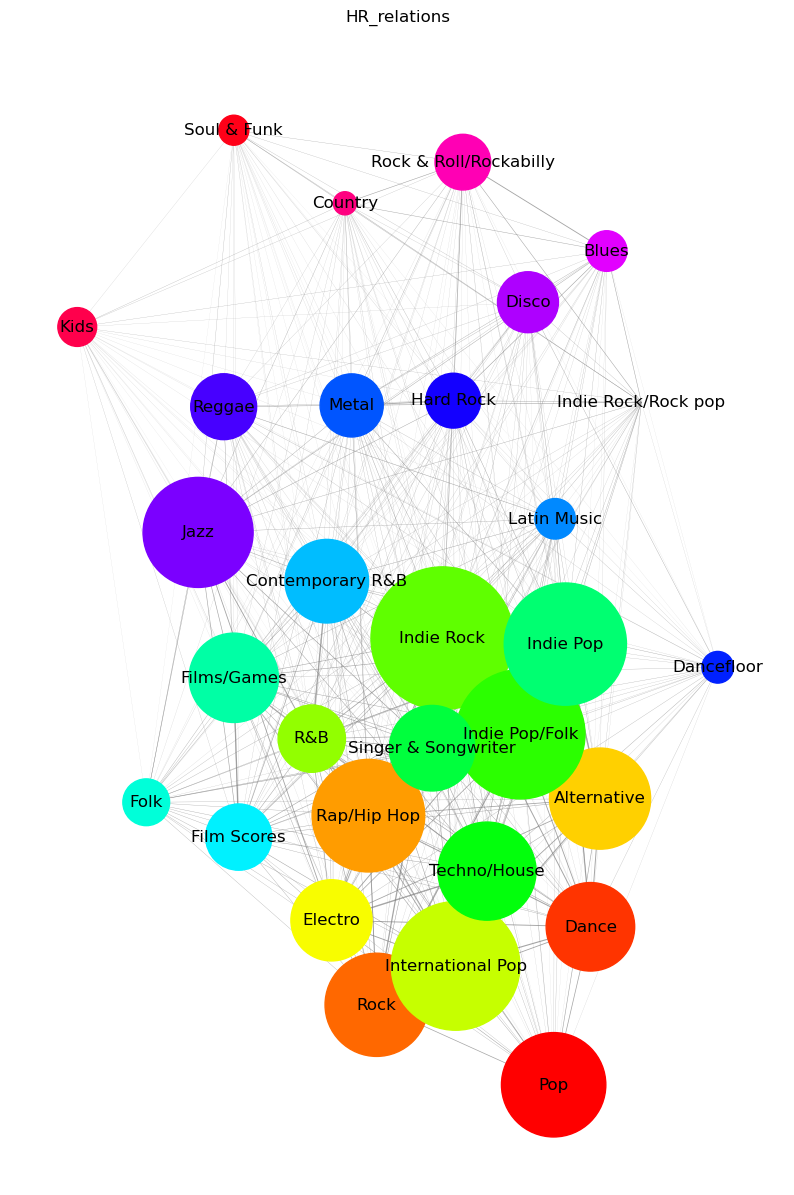

In [18]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


hr_heatmap = pd.read_csv("HR_relations_heatmap.csv").drop('index', axis=1)
genres = hr_heatmap.columns.values
df = hr_heatmap.set_index(pd.Index(genres))

# Получение списка жанров из колонок
genres = df.columns.tolist()

# Создание пустой таблицы
table = pd.DataFrame(columns=['Жанр1', 'Жанр2', 'Слушателей обоих', 'Слушателей жанра 1', 'Вес между связью'])

# Заполнение таблицы значениями
for i in range(len(genres)):
    for j in range(i + 1, len(genres)):
        genre1 = genres[i]
        genre2 = genres[j]
        listeners_both = df.iloc[i, j]  # Кол-во слушателей обоих жанров
        listeners_genre1 = df.iloc[i, i]  # Кол-во слушателей жанра1
        weight = listeners_both / (listeners_genre1/2) # Вес между связью (относительно кол-ва слушателей жанра1)
        row = pd.DataFrame({'Жанр1': genre1, 'Жанр2': genre2, 'Слушателей обоих': listeners_both, 'Слушателей жанра 1': listeners_genre1/2, 'Вес между связью': weight}, index=[0])
        table = pd.concat([table, row], ignore_index=True)



# Filter the top 10 genres by total weight
top_genres = table.groupby('Жанр1')['Слушателей жанра 1'].sum().nlargest(30).index

# Filter the table based on the top genres
filtered_table = table[table['Жанр1'].isin(top_genres) & table['Жанр2'].isin(top_genres)]

# Create an empty graph
graph = nx.Graph()

# Add nodes to the graph
for genre in top_genres:
    total_weight = filtered_table.loc[filtered_table['Жанр1'] == genre, 'Вес между связью'].sum()
    graph.add_node(genre, size=total_weight)

# Add edges to the graph
for _, row in filtered_table.iterrows():
    genre1 = row['Жанр1']
    genre2 = row['Жанр2']
    weight = row['Вес между связью']
    if weight != 0:  # Exclude edges with weight equal to 0
        graph.add_edge(genre1, genre2, weight=weight)

# Draw the graph
pos = nx.spring_layout(graph, seed=42)  # Adjust the layout algorithm as desired
node_sizes = [graph.nodes[node]['size'] * 1000 for node in graph.nodes()]
edge_weights = [graph.edges[edge]['weight'] for edge in graph.edges()]

cmap = plt.cm.get_cmap('hsv', len(graph.nodes()))

plt.figure(figsize=(10, 15))
plt.title('HR_relations')
nx.draw_networkx_nodes(graph, pos, node_color=np.arange(len(graph.nodes())), cmap=cmap, node_size=node_sizes)
nx.draw_networkx_edges(graph, pos, edge_color='gray', width=edge_weights, alpha=0.7)
nx.draw_networkx_labels(graph, pos, font_size=12, font_color='black')
plt.axis('off')
plt.savefig('HR.png',dpi=300)
plt.show()

/var/folders/m9/frbq2rzx7gb6k4ntfp_m5bbc0000gn/T/ipykernel_6903/4026870235.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', len(graph.nodes()))


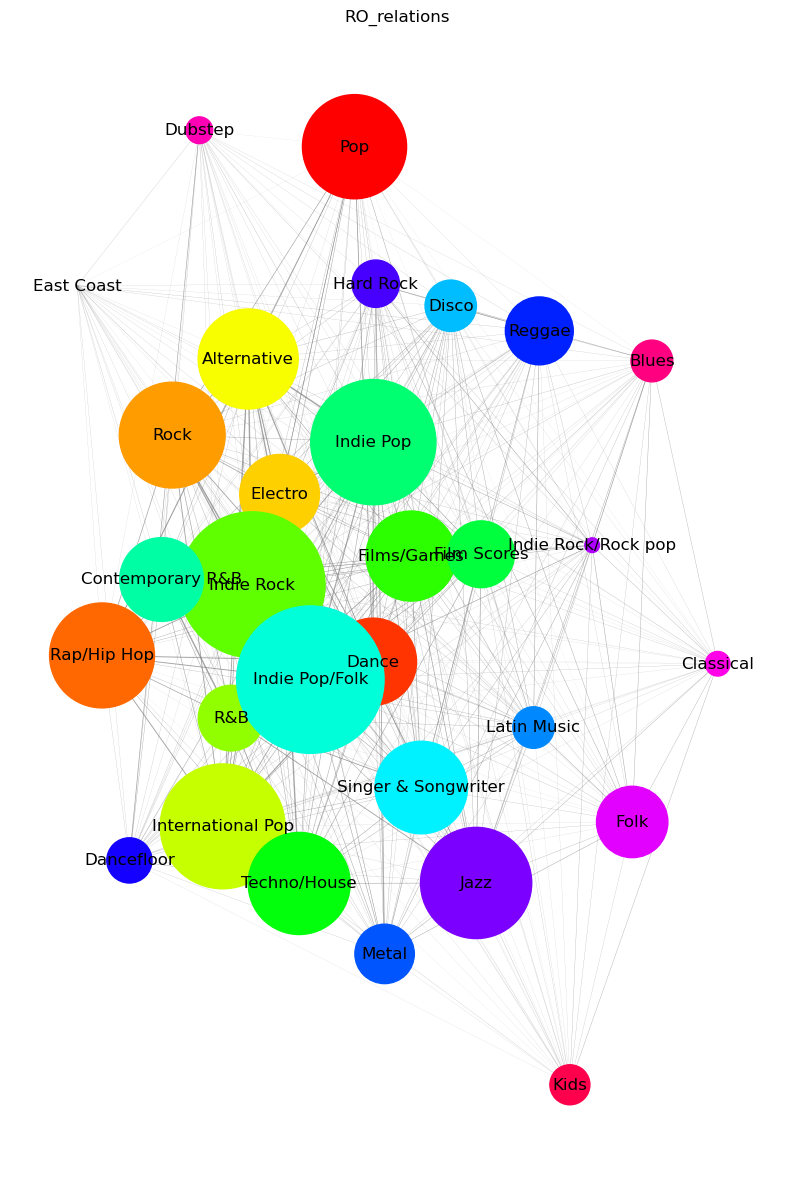

In [19]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


hr_heatmap = pd.read_csv("RO_relations_heatmap.csv").drop('index', axis=1)
genres = hr_heatmap.columns.values
df = hr_heatmap.set_index(pd.Index(genres))

# Получение списка жанров из колонок
genres = df.columns.tolist()

# Создание пустой таблицы
table = pd.DataFrame(columns=['Жанр1', 'Жанр2', 'Слушателей обоих', 'Слушателей жанра 1', 'Вес между связью'])

# Заполнение таблицы значениями
for i in range(len(genres)):
    for j in range(i + 1, len(genres)):
        genre1 = genres[i]
        genre2 = genres[j]
        listeners_both = df.iloc[i, j]  # Кол-во слушателей обоих жанров
        listeners_genre1 = df.iloc[i, i]  # Кол-во слушателей жанра1
        weight = listeners_both / (listeners_genre1/2) # Вес между связью (относительно кол-ва слушателей жанра1)
        row = pd.DataFrame({'Жанр1': genre1, 'Жанр2': genre2, 'Слушателей обоих': listeners_both, 'Слушателей жанра 1': listeners_genre1/2, 'Вес между связью': weight}, index=[0])
        table = pd.concat([table, row], ignore_index=True)



# Filter the top 10 genres by total weight
top_genres = table.groupby('Жанр1')['Слушателей жанра 1'].sum().nlargest(30).index

# Filter the table based on the top genres
filtered_table = table[table['Жанр1'].isin(top_genres) & table['Жанр2'].isin(top_genres)]

# Create an empty graph
graph = nx.Graph()

# Add nodes to the graph
for genre in top_genres:
    total_weight = filtered_table.loc[filtered_table['Жанр1'] == genre, 'Вес между связью'].sum()
    graph.add_node(genre, size=total_weight)

# Add edges to the graph
for _, row in filtered_table.iterrows():
    genre1 = row['Жанр1']
    genre2 = row['Жанр2']
    weight = row['Вес между связью']
    if weight != 0:  # Exclude edges with weight equal to 0
        graph.add_edge(genre1, genre2, weight=weight)

# Draw the graph
pos = nx.spring_layout(graph, seed=42)  # Adjust the layout algorithm as desired
node_sizes = [graph.nodes[node]['size'] * 1000 for node in graph.nodes()]
edge_weights = [graph.edges[edge]['weight'] for edge in graph.edges()]

cmap = plt.cm.get_cmap('hsv', len(graph.nodes()))

plt.figure(figsize=(10, 15))
plt.title('RO_relations')
nx.draw_networkx_nodes(graph, pos, node_color=np.arange(len(graph.nodes())), cmap=cmap, node_size=node_sizes)
nx.draw_networkx_edges(graph, pos, edge_color='gray', width=edge_weights, alpha=0.7)
nx.draw_networkx_labels(graph, pos, font_size=12, font_color='black')
plt.axis('off')
plt.savefig('RO.png',dpi=300)
plt.show()